---
##6.&nbsp; Challenge: apply this to the spotify dataset 😃
In a new notebook, try out the different scalers and transformers on the Spotify data and compare the results. Which scaler do you feel had the greatest impact? And, maybe, which scaler didn't help at all?

>With the carefully chosen 10 songs, you might not see a massive effect. But soon we'll start working with a Spotify dataset of 5000 songs, where scaling will have a much larger impact.

**If you finish early** and would like to learn more about scaling:
- [SKLearn: Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
- [SKLearn: Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)

In [1]:
#import libraries
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [2]:
#importing data
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter 6 Unsupervised ML/data/6.3.2_spotify_10_songs.csv'
songs = pd.read_csv(url) #reading csv
songs_df = pd.DataFrame(songs) #creating dataframe
songs_df

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band ...,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady ...,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março ...,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema ...,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black ...",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing ...,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix ...,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence ...,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [3]:
songs_df.columns


Index(['song_name                                                               ',
       'artist               ', 'danceability ', 'energy  ', 'key ',
       'loudness ', 'mode ', 'speechiness ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ',
       'duration_ms ', 'time_signature ', 'id                     ', 'html'],
      dtype='object')

**column names contain huge spaces in between, we have to clean them**

In [4]:
songs_df.columns = songs_df.columns.str.replace(' ', '')

In [5]:
#after cleaning the column names
songs_df.columns


Index(['song_name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [6]:
#we want to set song name and artist as our index
songs_df = songs_df.set_index(['artist'])
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist,,,,,,,,,,,,,,,,
D12,My Band ...,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
Eminem,The Real Slim Shady ...,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Antônio Carlos Jobim,Águas De Março ...,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
Stan Getz,The Girl From Ipanema ...,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
The Rolling Stones,"Paint It, Black ...",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Dire Straits,Sultans Of Swing ...,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Eats Everything,Space Raiders - Charlotte de Witte Remix ...,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
Amelie Lens,In Silence ...,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [7]:
#I want to drop id and html, duration_ms, time_signature
songs_df_del = songs_df.drop(columns= ['id', 'html', 'duration_ms', 'time_signature', 'song_name', 'tempo', 'loudness'])
songs_df_del

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence
artist,,,,,,,,,
D12,0.851,0.84900,1,0,0.0828,0.49700,0.000002,0.1160,0.8440
Eminem,0.949,0.66100,5,0,0.0572,0.03020,0.000000,0.0454,0.7600
Antônio Carlos Jobim,0.642,0.33900,3,1,0.1400,0.85400,0.000000,0.1050,0.4910
Stan Getz,0.641,0.14000,8,1,0.0390,0.86700,0.001660,0.1050,0.3880
The Rolling Stones,0.464,0.79500,1,1,0.0926,0.04930,0.002440,0.3990,0.6120
Dire Straits,0.733,0.79400,5,1,0.0307,0.06140,0.036700,0.3300,0.9310
Eats Everything,0.749,0.73100,4,1,0.1080,0.00314,0.867000,0.1110,0.0598
Amelie Lens,0.736,0.84500,1,1,0.0377,0.00548,0.901000,0.1110,0.1980
Johannes Brahms,0.184,0.00833,3,1,0.0519,0.98900,0.596000,0.1040,0.2110


In [9]:
song_distances_df = pd.DataFrame(pairwise_distances(songs_df_del),
                                     index=songs_df_del.index,
                                     columns=songs_df_del.index)
song_distances_df

artist,D12,Eminem,Antônio Carlos Jobim,Stan Getz,The Rolling Stones,Dire Straits,Eats Everything,Amelie Lens,Johannes Brahms,Frédéric Chopin
artist,,,,,,,,,,
D12,0.000000,4.034296,2.357802,7.133979,1.219482,4.155012,3.411091,1.576707,2.674076,2.745517
Eminem,4.034296,0.000000,2.441178,3.347956,4.171540,1.085175,1.815072,4.267571,2.755101,2.815946
Antônio Carlos Jobim,2.357802,2.441178,0.000000,5.006055,2.233941,2.258548,1.681594,2.427552,0.882446,1.091169
Stan Getz,7.133979,3.347956,5.006055,0.000000,7.090026,3.229852,4.238930,7.147952,5.062194,5.100954
The Rolling Stones,1.219482,4.171540,2.233941,7.090026,0.000000,4.022939,3.197346,1.069190,2.486379,2.580799
Dire Straits,4.155012,1.085175,2.258548,3.229852,4.022939,0.000000,1.584280,4.163898,2.581058,2.664193
Eats Everything,3.411091,1.815072,1.681594,4.238930,3.197346,1.584280,0.000000,3.006388,1.706721,1.607098
Amelie Lens,1.576707,4.267571,2.427552,7.147952,1.069190,4.163898,3.006388,0.000000,2.462819,2.397331
Johannes Brahms,2.674076,2.755101,0.882446,5.062194,2.486379,2.581058,1.706721,2.462819,0.000000,0.403677


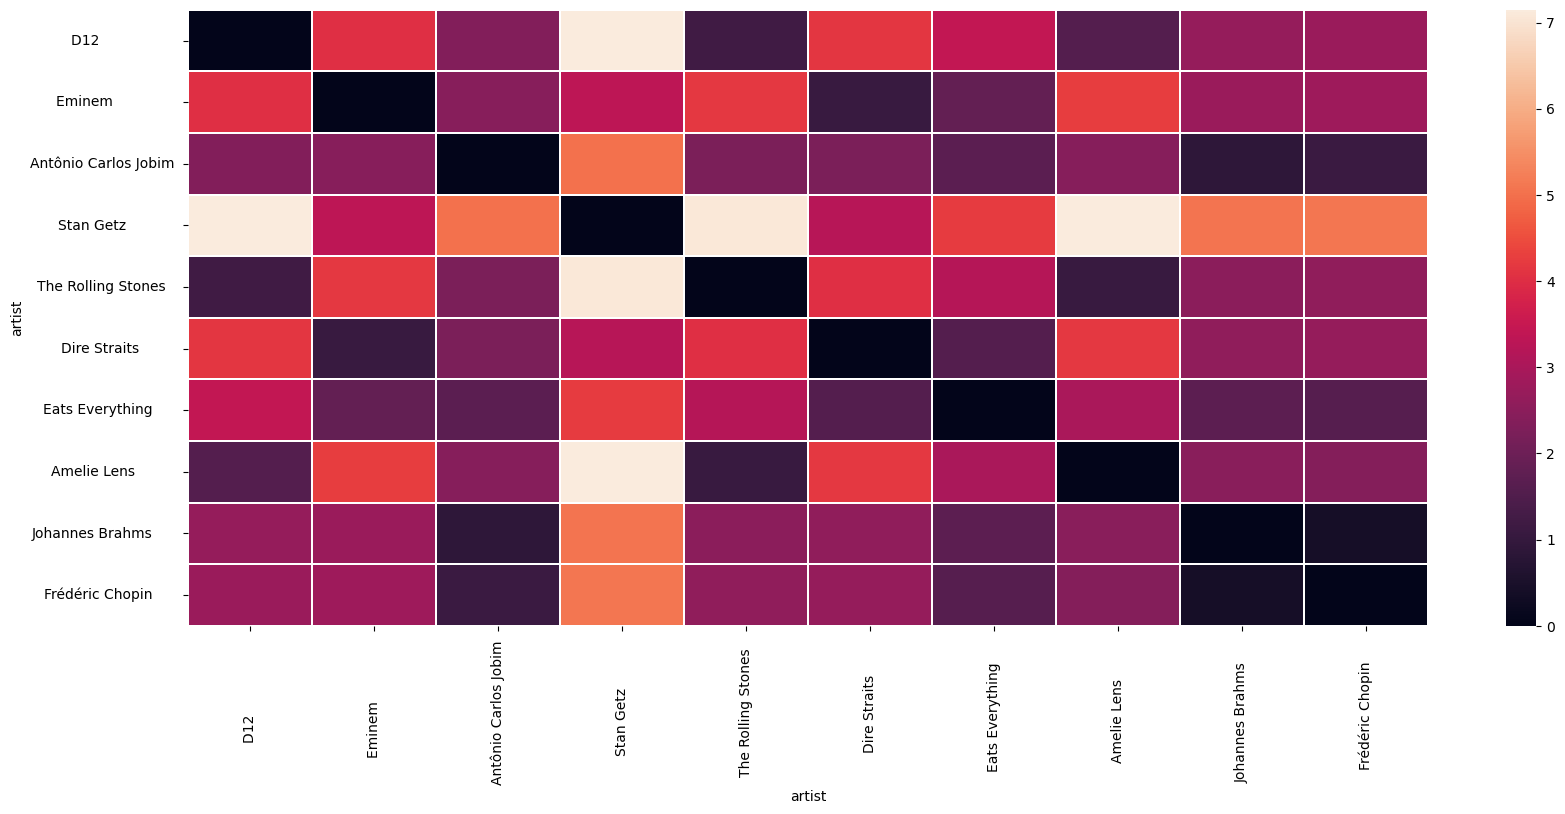

In [10]:
# Stating that we want two plots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
 
# Plotting the two plots
sns.heatmap(song_distances_df, ax=ax1, linewidths=.2);

---
##.&nbsp; Scalers - changing the range, but not the distribution 🎚️
When we scale with SKLearn we get the choice to use a variety of scalers. Scalers do not change the distribution of the data, they change the range of the data.

> **Remember:** Range = Max - Min

&nbsp; Min and Max Scaling
All columns get scaled between 0 and 1. The lowest value of a column becomes 0, the highest value of a column becomes 1, and all other values get scaled in between.

\begin{align}
newValue = \frac{oldValue - min(column)}{max(column) - min(column)}
    \end{align}

Let's apply Min Max scaling to the small sized DataFrame:

In [12]:
#create a MInMaxscaler object
scaler = MinMaxScaler().set_output(transform='pandas')

#scale the songs_df_del Dataframe
minmax_songs_df_del = scaler.fit_transform(songs_df_del)
minmax_songs_df_del

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence
artist,,,,,,,,,
D12,0.871895,1.000000,0.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138
Eminem,1.000000,0.776369,0.571429,0.0,0.242452,0.027420,0.000000,0.000000,0.803719
Antônio Carlos Jobim,0.598693,0.393341,0.285714,1.0,1.000000,0.862189,0.000000,0.168552,0.494949
Stan Getz,0.597386,0.156625,1.000000,1.0,0.075938,0.875362,0.001818,0.168552,0.376722
The Rolling Stones,0.366013,0.935766,0.000000,1.0,0.566331,0.046775,0.002673,1.000000,0.633838
Dire Straits,0.717647,0.934576,0.571429,1.0,0.000000,0.059036,0.040197,0.804864,1.000000
Eats Everything,0.738562,0.859636,0.428571,1.0,0.707228,0.000000,0.949617,0.185520,0.000000
Amelie Lens,0.721569,0.995242,0.000000,1.0,0.064044,0.002371,0.986857,0.185520,0.158632
Johannes Brahms,0.000000,0.000000,0.285714,1.0,0.193962,0.998987,0.652793,0.165724,0.173554


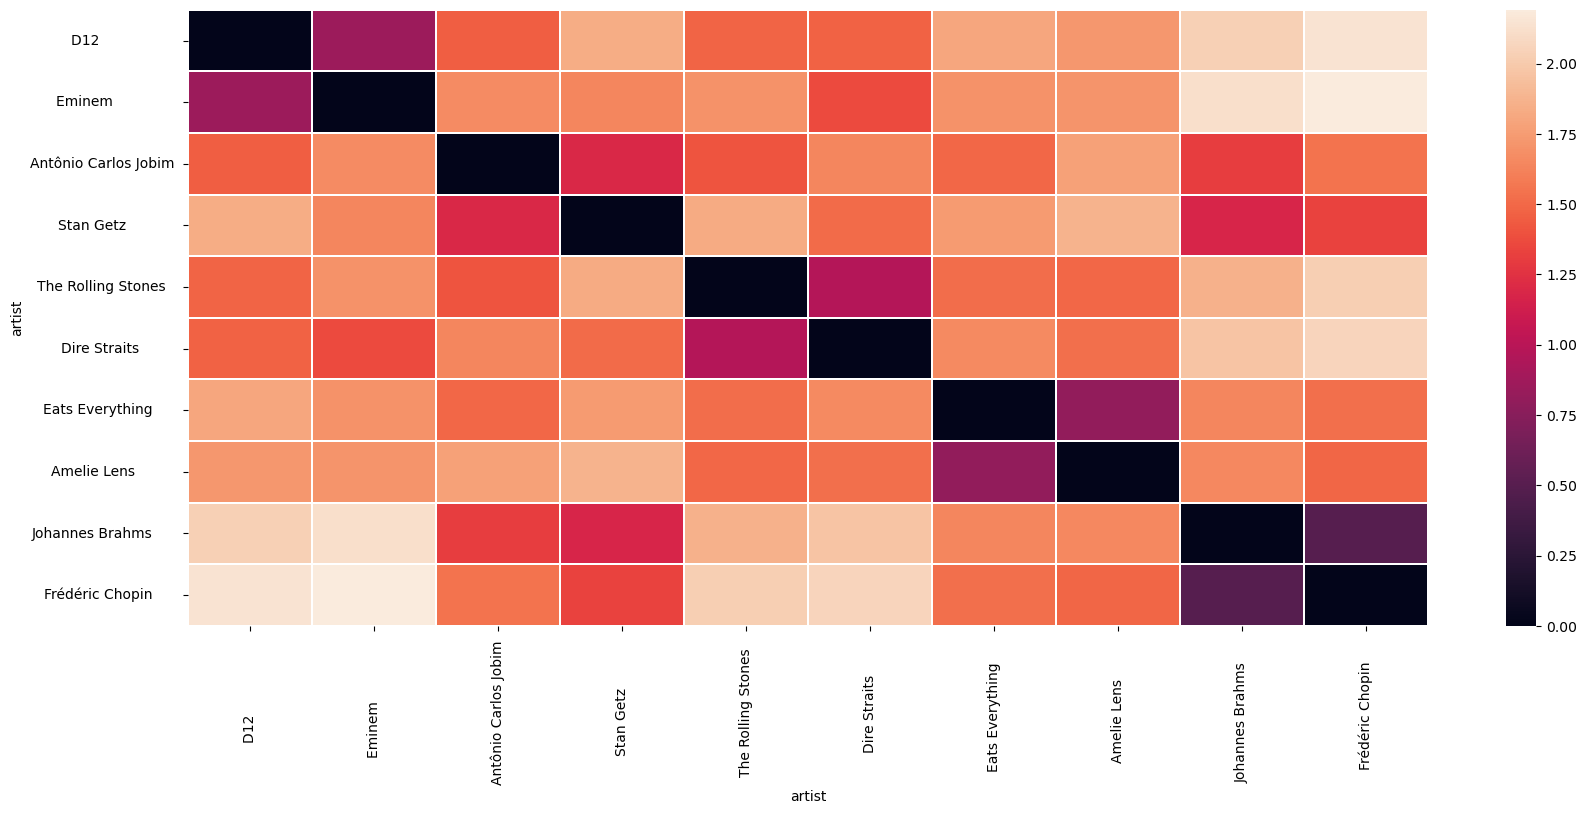

In [15]:
#creating heatmap

song_distances_minmax = pd.DataFrame(pairwise_distances(minmax_songs_df_del),
                                     index=minmax_songs_df_del.index,
                                     columns=minmax_songs_df_del.index)
song_distances_minmax

# Stating that we want two plots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))
 
# Plotting the two plots
sns.heatmap(song_distances_minmax, ax=ax1, linewidths=.2);

In [16]:
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist,,,,,,,,,,,,,,,,
D12,My Band ...,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
Eminem,The Real Slim Shady ...,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Antônio Carlos Jobim,Águas De Março ...,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
Stan Getz,The Girl From Ipanema ...,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
The Rolling Stones,"Paint It, Black ...",0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
Dire Straits,Sultans Of Swing ...,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
Eats Everything,Space Raiders - Charlotte de Witte Remix ...,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
Amelie Lens,In Silence ...,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
Johannes Brahms,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...


In [18]:
songs_df_cl = songs_df.drop(columns= ['id', 'html','song_name'])
songs_df_cl 


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3


**APPLYING MIN MAX SCALER TO THE WHOLE DATAFRAME**

In [19]:
scaler_mm = MinMaxScaler().set_output(transform="pandas")
songs_df_cl_mm = scaler_mm.fit_transform(songs_df_cl)
songs_df_cl_mm

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0


**comapre loudness before and after minmax scaling**

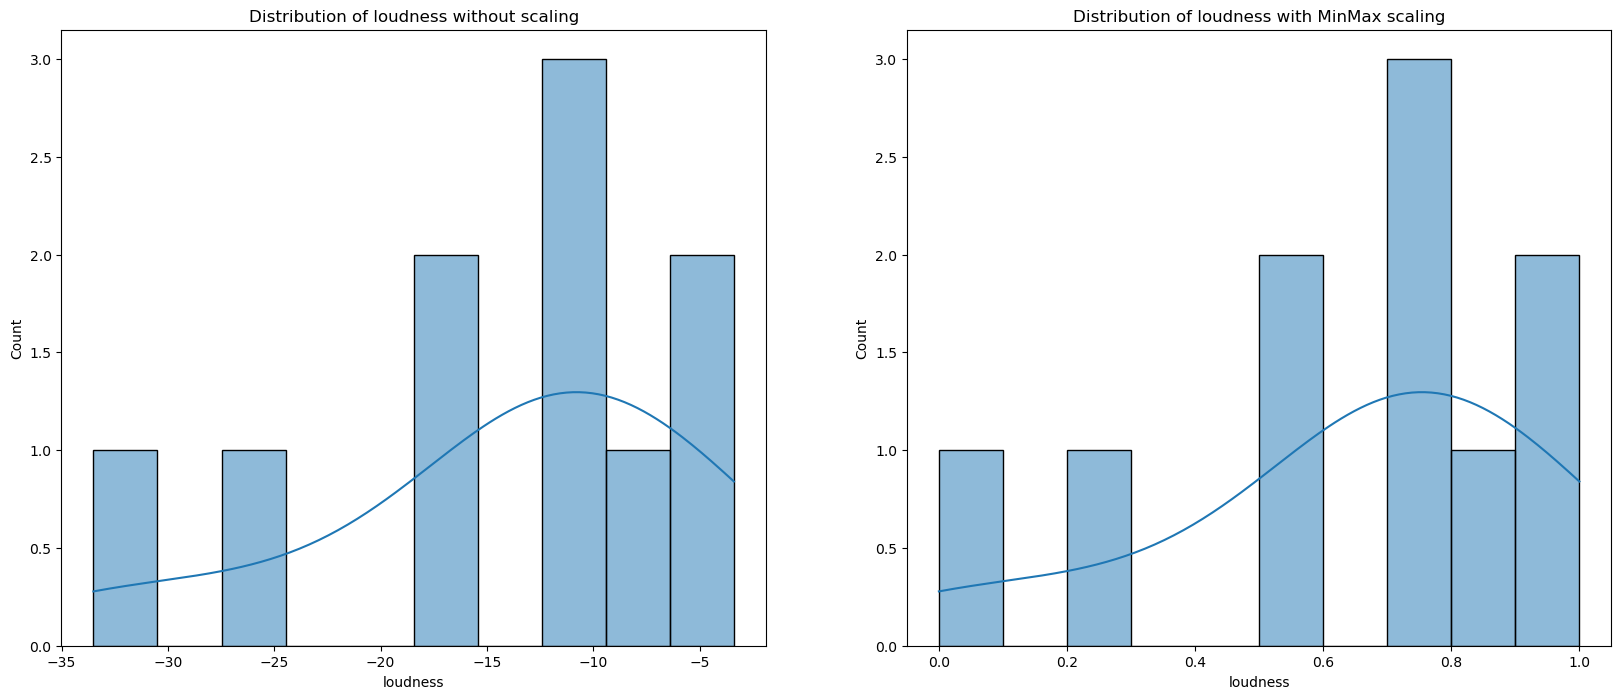

In [20]:
#plotting loudness
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax= ax1);
sns.histplot(songs_df_cl_mm.iloc[:,3], bins=10, kde=True, ax= ax2);

# Adding titles to the plots
ax1.set_title('Distribution of loudness without scaling')
ax2.set_title('Distribution of loudness with MinMax scaling')

plt.show()

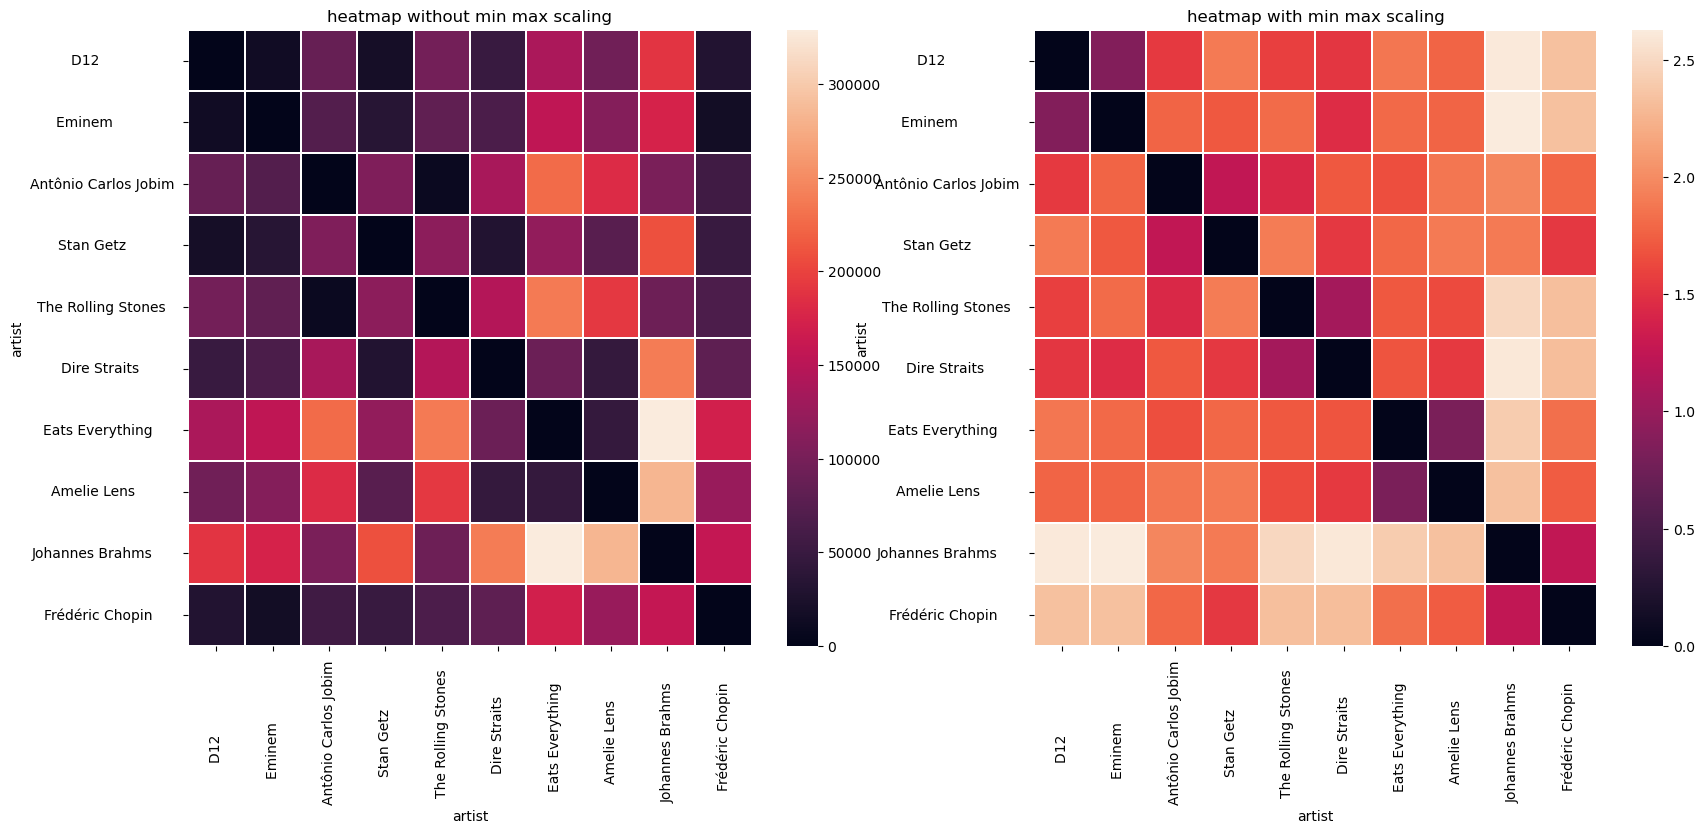

In [29]:
#comparing heatmap of two data frame before and after applying min max scaling
songs_df_cl_mm_pair = pd.DataFrame(pairwise_distances(songs_df_cl_mm),
                                   index = songs_df_cl.index,
                                   columns=songs_df_cl.index
                                   )
songs_df_cl_pair = pd.DataFrame(pairwise_distances(songs_df_cl),
                                index=songs_df_cl.index,
                                columns=songs_df_cl.index)

#Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.heatmap(songs_df_cl_pair, ax=ax1, linewidths=.2)
sns.heatmap(songs_df_cl_mm_pair, ax= ax2, linewidths=.2)

ax1.set_title('heatmap without min max scaling')
ax2.set_title('heatmap with min max scaling')



plt.show()

&nbsp; Standard scaler

The StandardScaler scales all features according to the standard deviation of the feature. The standard deviation is equal to 1, and all other values are scaled accordingly. The data is also centered around 0, meaning that the mean becomes 0 and all values less than the mean are negative, while all values higher than the mean are positive.

\begin{align}
newValue = \frac{oldValue - mean(column)}{std(column)}
    \end{align}

Let's apply this to the whole DataFrame:

In [24]:
standard_scaler = StandardScaler().set_output(transform = 'pandas')
songs_df_cl_standard = standard_scaler.fit_transform(songs_df_cl)
songs_df_cl_standard

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,1.000384,0.992687,-1.138990,1.217434,-2.0,0.435538,0.146786,-0.816077,-0.349827,1.270021,0.040646,0.123210,0.333333
Eminem,1.451340,0.424153,0.759326,1.118976,-2.0,-0.299450,-0.952202,-0.816082,-1.002517,0.994657,-0.445036,-0.035980,0.333333
Antônio Carlos Jobim,0.038653,-0.549612,-0.189832,-0.168522,0.5,2.077778,0.987271,-0.816082,-0.451521,0.112834,0.773521,-0.820299,0.333333
Stan Getz,0.034052,-1.151411,2.183063,-0.315694,0.5,-0.821981,1.017877,-0.811999,-0.451521,-0.224816,0.331992,0.333097,0.333333
The Rolling Stones,-0.780429,0.829385,-1.138990,0.544582,0.5,0.716901,-0.907235,-0.810080,2.266479,0.509490,1.251782,-0.930989,0.333333
Dire Straits,0.457397,0.826361,0.759326,0.458132,0.5,-1.060278,-0.878748,-0.725811,1.628581,1.555220,0.922451,0.667766,0.333333
Eats Everything,0.531023,0.635842,0.284747,0.361846,0.5,1.159042,-1.015909,1.316484,-0.396051,-1.300705,0.415883,1.651944,0.333333
Amelie Lens,0.471202,0.980591,-1.138990,0.230112,0.5,-0.859305,-1.010400,1.400114,-0.396051,-0.847664,0.291002,1.160598,0.333333
Johannes Brahms,-2.068872,-1.549596,-0.189832,-2.226872,0.5,-0.451616,1.305102,0.649903,-0.460766,-0.805048,-1.790384,-1.941067,-3.000000


Text(0.5, 1.0, 'distribution of Loudness with standard scaling')

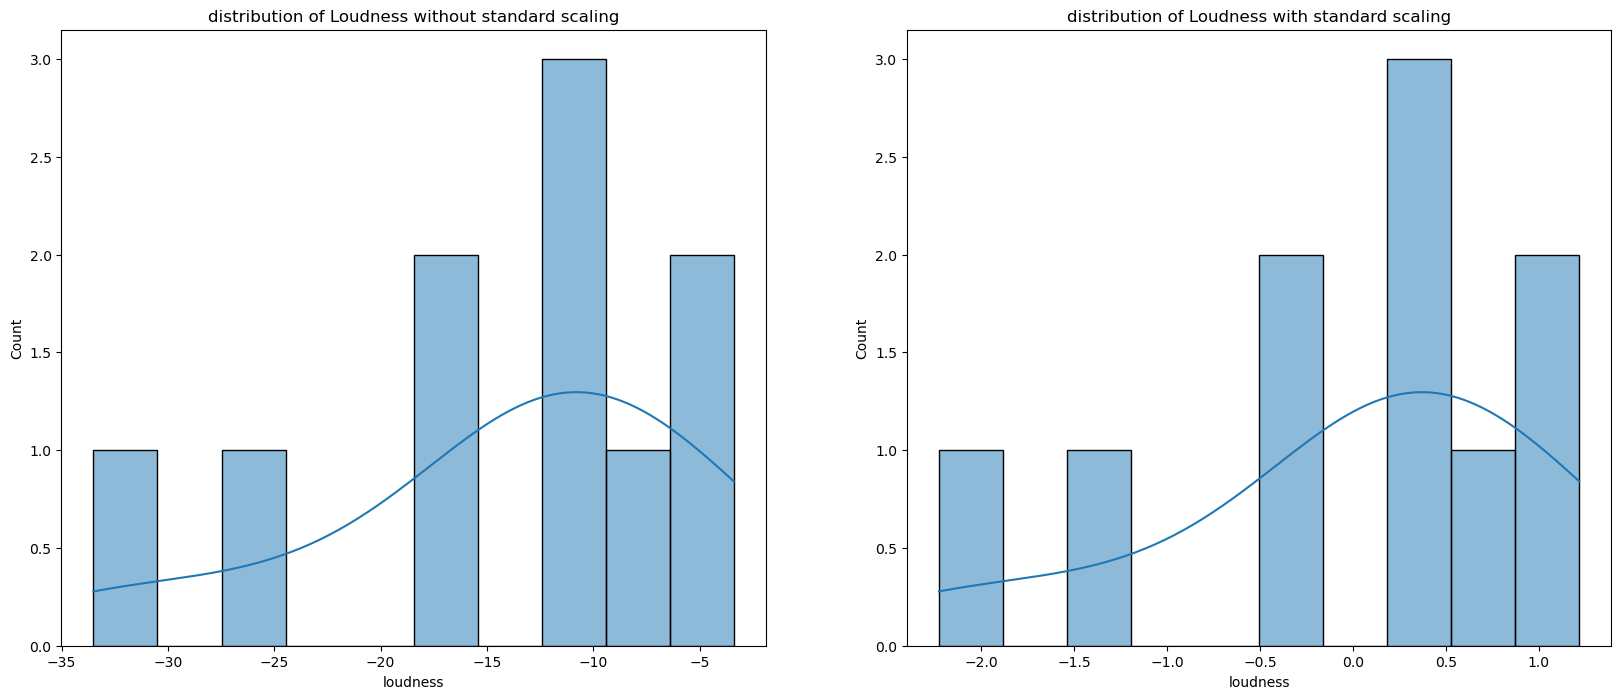

In [26]:
#compare the effect of standard scaling over loudness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.histplot(data = songs_df_cl.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(data= songs_df_cl_standard.iloc[:, 3], bins=10, kde=True, ax=ax2);

ax1.set_title('distribution of Loudness without standard scaling')
ax2.set_title('distribution of Loudness with standard scaling')

Let's have a look at the affect Standard scaling had on the heatmap

Text(0.5, 1.0, 'heatmap with standard scaling')

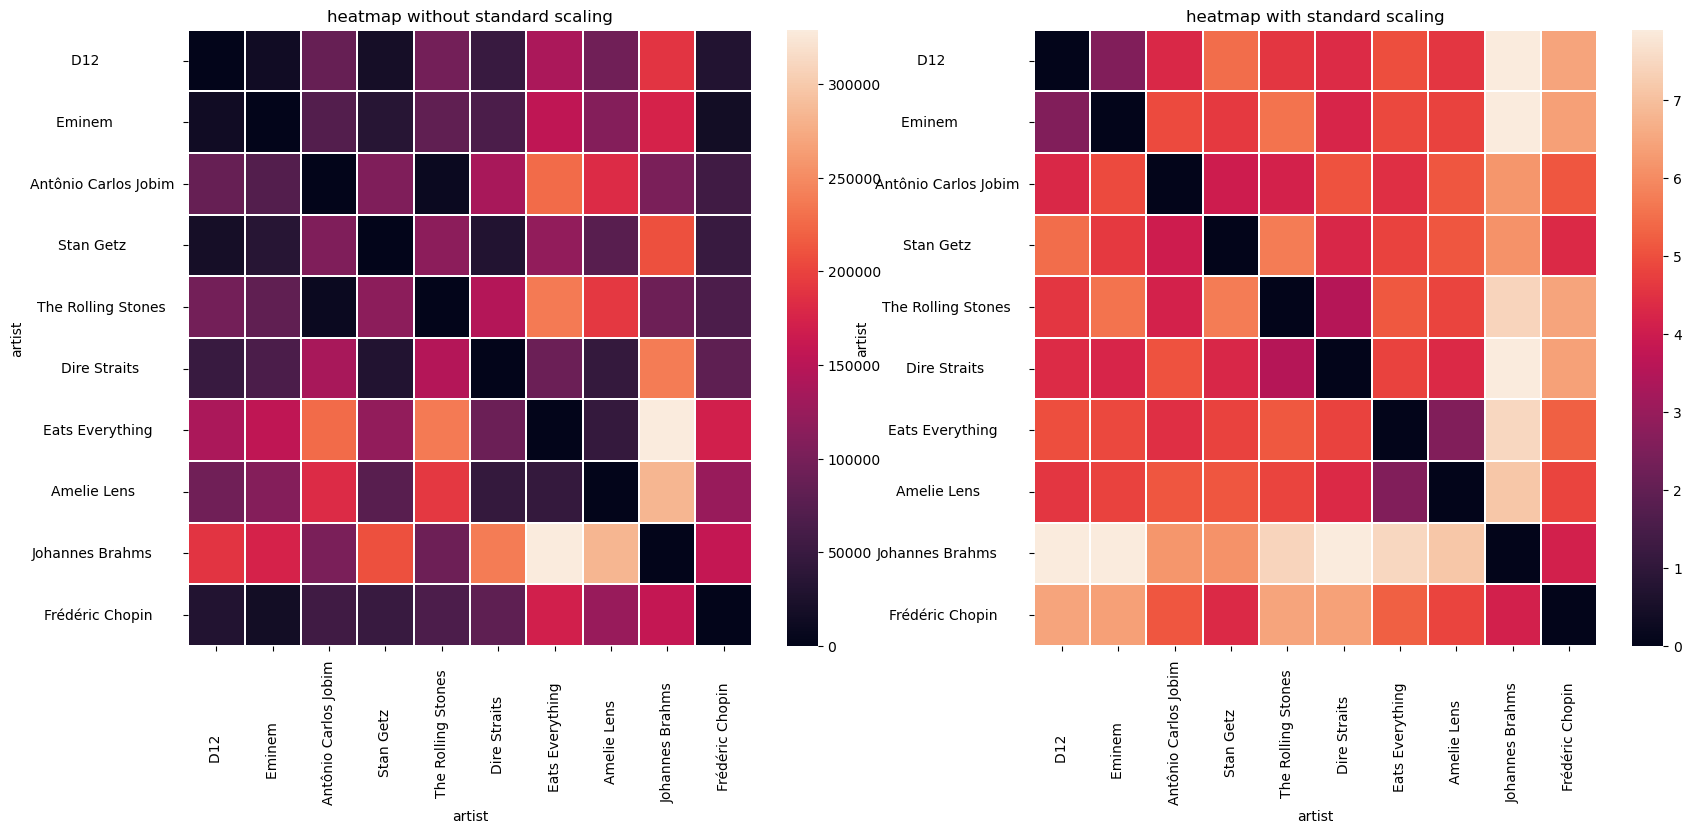

In [28]:
songs_df_cl_standard_pair = pd.DataFrame(pairwise_distances(songs_df_cl_standard),
                                         index=songs_df_cl.index,
                                         columns= songs_df_cl.index)

songs_df_cl_pair = pd.DataFrame(pairwise_distances(songs_df_cl),
                                index=songs_df_cl.index,
                                columns=songs_df_cl.index)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(data=songs_df_cl_pair, ax=ax1, linewidths=.2)
sns.heatmap(data=songs_df_cl_standard_pair, ax=ax2, linewidths=.2)

ax1.set_title('heatmap without standard scaling')
ax2.set_title('heatmap with standard scaling')


&nbsp; Robust scaler

The RobustScaler scales all features between their interquartile ranges (IQRs). The IQR is the difference between the third quartile (Q3) and the first quartile (Q1) of the feature. The lowest value of the feature is scaled to Q1, the highest value of the feature is scaled to Q3, and all other values are scaled in between. The data is also centered around 0, meaning that the median becomes 0 and all values less than the median are negative, while all values higher than the median are positive.

\begin{align}
newValue = \frac{oldValue - median(column)}{IQR(column)}
      \end{align}

Let's apply this to the whole DataFrame:

In [30]:
robust_scaler = RobustScaler().set_output(transform='pandas')
songs_df_cl_robust = robust_scaler.fit_transform(songs_df_cl)
songs_df_cl_robust

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.688421,0.252893,-0.615385,1.149132,-1.0,0.541966,0.262798,-0.024496,0.50,0.775276,-0.268775,0.063605,0.0
Eminem,1.101053,-0.057851,0.615385,1.026347,-1.0,0.050839,-0.300443,-0.024498,-6.56,0.614279,-0.750732,-0.063605,0.0
Antônio Carlos Jobim,-0.191579,-0.590083,0.000000,-0.579272,0.0,1.639329,0.693554,-0.024498,-0.60,0.098706,0.458481,-0.690362,0.0
Stan Getz,-0.195789,-0.919008,1.538462,-0.762808,0.0,-0.298321,0.709240,-0.022420,-0.60,-0.098706,0.020338,0.231328,0.0
The Rolling Stones,-0.941053,0.163636,-0.615385,0.310029,0.0,0.729976,-0.277397,-0.021444,28.80,0.330618,0.933074,-0.778815,0.0
Dire Straits,0.191579,0.161983,0.615385,0.202218,0.0,-0.457554,-0.262798,0.021444,21.90,0.942022,0.606269,0.498765,0.0
Eats Everything,0.258947,0.057851,0.307692,0.082142,0.0,1.025420,-0.333094,1.060834,0.00,-0.727743,0.103585,1.285231,0.0
Amelie Lens,0.204211,0.246281,-0.615385,-0.082142,0.0,-0.323261,-0.330271,1.103396,0.00,-0.462865,-0.020338,0.892592,0.0
Johannes Brahms,-2.120000,-1.136645,0.000000,-3.146208,0.0,-0.050839,0.856445,0.721590,-0.70,-0.437949,-2.085764,-1.585978,-1.0


Text(0.5, 1.0, 'distribution with robust scaling')

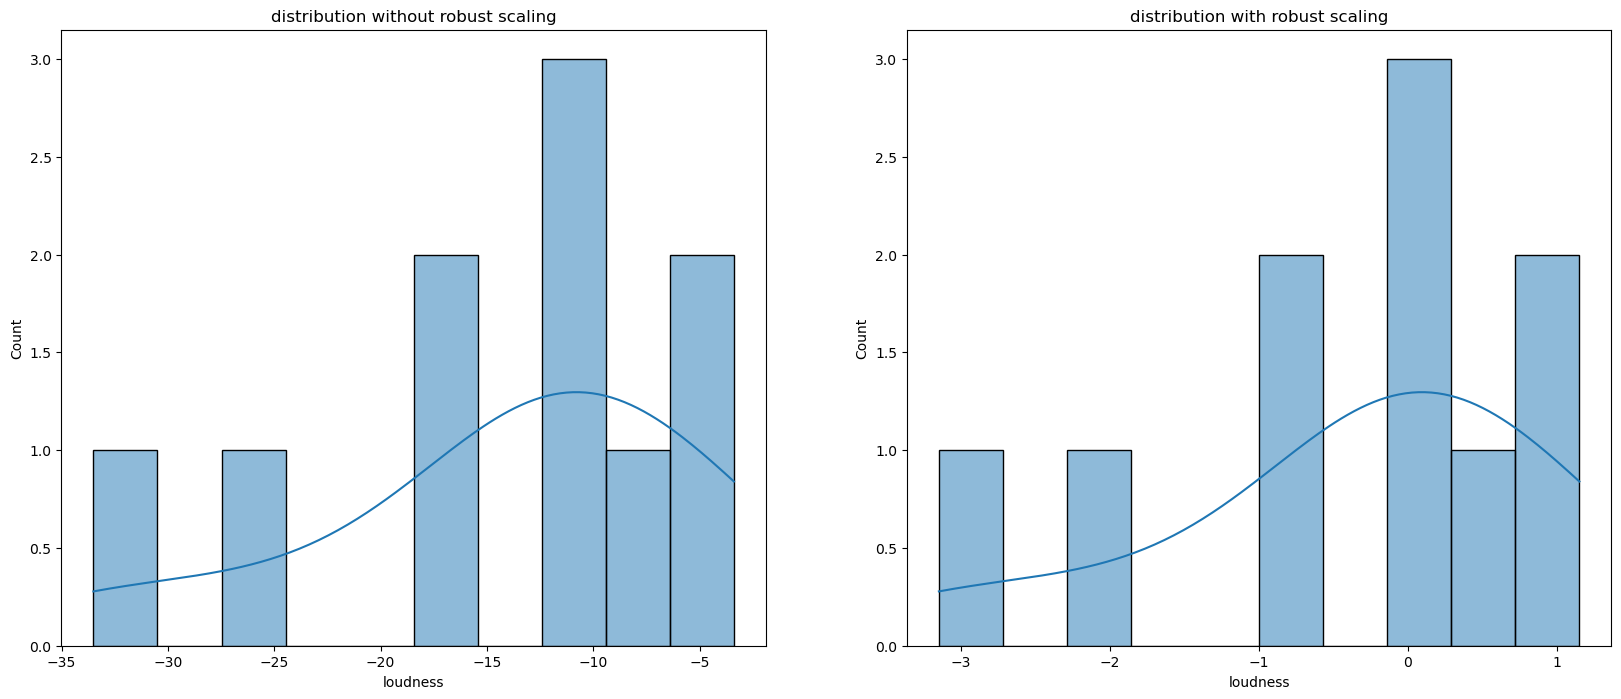

In [31]:
#compare the effect of robust scaling over loudness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(data=songs_df_cl_robust.iloc[:,3], bins=10, kde=True, ax=ax2);

ax1.set_title('distribution without robust scaling')
ax2.set_title('distribution with robust scaling')

Text(0.5, 1.0, 'heatmap with robust scaling')

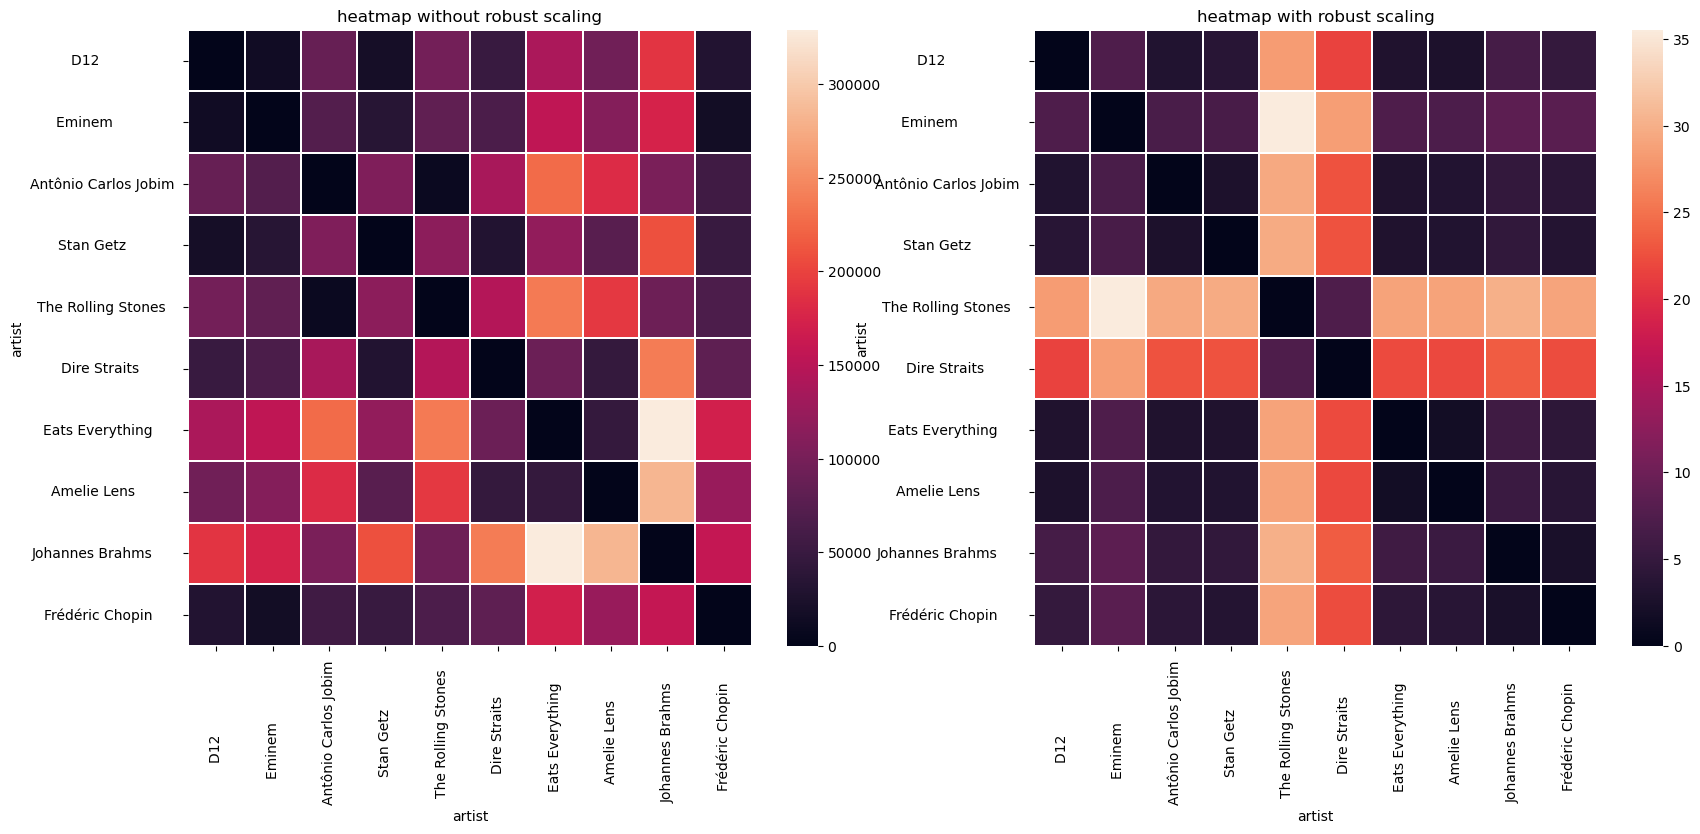

In [37]:
#effect og robust scaling over heatmap

songs_df_cl_robust_pair = pd.DataFrame(pairwise_distances(songs_df_cl_robust),
                                         index=songs_df_cl.index,
                                         columns= songs_df_cl.index)

songs_df_cl_pair = pd.DataFrame(pairwise_distances(songs_df_cl),
                                index=songs_df_cl.index,
                                columns=songs_df_cl.index)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(data=songs_df_cl_pair, ax=ax1, linewidths=.2)
sns.heatmap(data=songs_df_cl_robust_pair, ax=ax2, linewidths=.2)

ax1.set_title('heatmap without robust scaling')
ax2.set_title('heatmap with robust scaling')


---
#&nbsp; Transformers - changing the range and the distribution 🎛️
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths. The assumption that the distribution is normal is explicitly used in the calculations for models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc.

###&nbsp; Quantile transformer

All of the columns get scaled according to their [quantile](https://en.wikipedia.org/wiki/Quantile).

> **Note:** Quantiles are divisions of data that tell us how much of the data is present below a certain point. For example, the median is the middle value in a dataset, so it is a quantile of 0.5, meaning that half of the data exists at or below the median. Similarly, 78% of the data exists at or below the quantile 0.78.

Let's apply this to the whole DataFrame:

In [34]:
number_of_samples = songs_df_cl.shape[0]
quintile_scaler = QuantileTransformer(n_quantiles=number_of_samples).set_output(transform='pandas')
songs_df_cl_quantile = quintile_scaler.fit_transform(songs_df_cl)
songs_df_cl_quantile

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,0.888889,1.000000,0.000000,1.000000,0.0,0.666667,0.555556,0.222222,0.777778,0.888889,0.333333,0.555556,1.0
Eminem,1.000000,0.444444,0.888889,0.888889,0.0,0.555556,0.222222,0.000000,0.000000,0.777778,0.222222,0.444444,1.0
Antônio Carlos Jobim,0.444444,0.333333,0.500000,0.333333,1.0,1.000000,0.666667,0.000000,0.277778,0.555556,0.777778,0.222222,1.0
Stan Getz,0.333333,0.222222,1.000000,0.222222,1.0,0.333333,0.777778,0.333333,0.277778,0.444444,0.555556,0.666667,1.0
The Rolling Stones,0.222222,0.777778,0.000000,0.777778,1.0,0.777778,0.333333,0.444444,1.000000,0.666667,1.000000,0.111111,1.0
Dire Straits,0.555556,0.666667,0.888889,0.666667,1.0,0.000000,0.444444,0.555556,0.888889,1.000000,0.888889,0.777778,1.0
Eats Everything,0.777778,0.555556,0.666667,0.555556,1.0,0.888889,0.000000,0.777778,0.500000,0.000000,0.666667,1.000000,1.0
Amelie Lens,0.666667,0.888889,0.000000,0.444444,1.0,0.222222,0.111111,0.888889,0.500000,0.222222,0.444444,0.888889,1.0
Johannes Brahms,0.000000,0.000000,0.500000,0.000000,1.0,0.444444,0.888889,0.666667,0.111111,0.333333,0.111111,0.000000,0.0


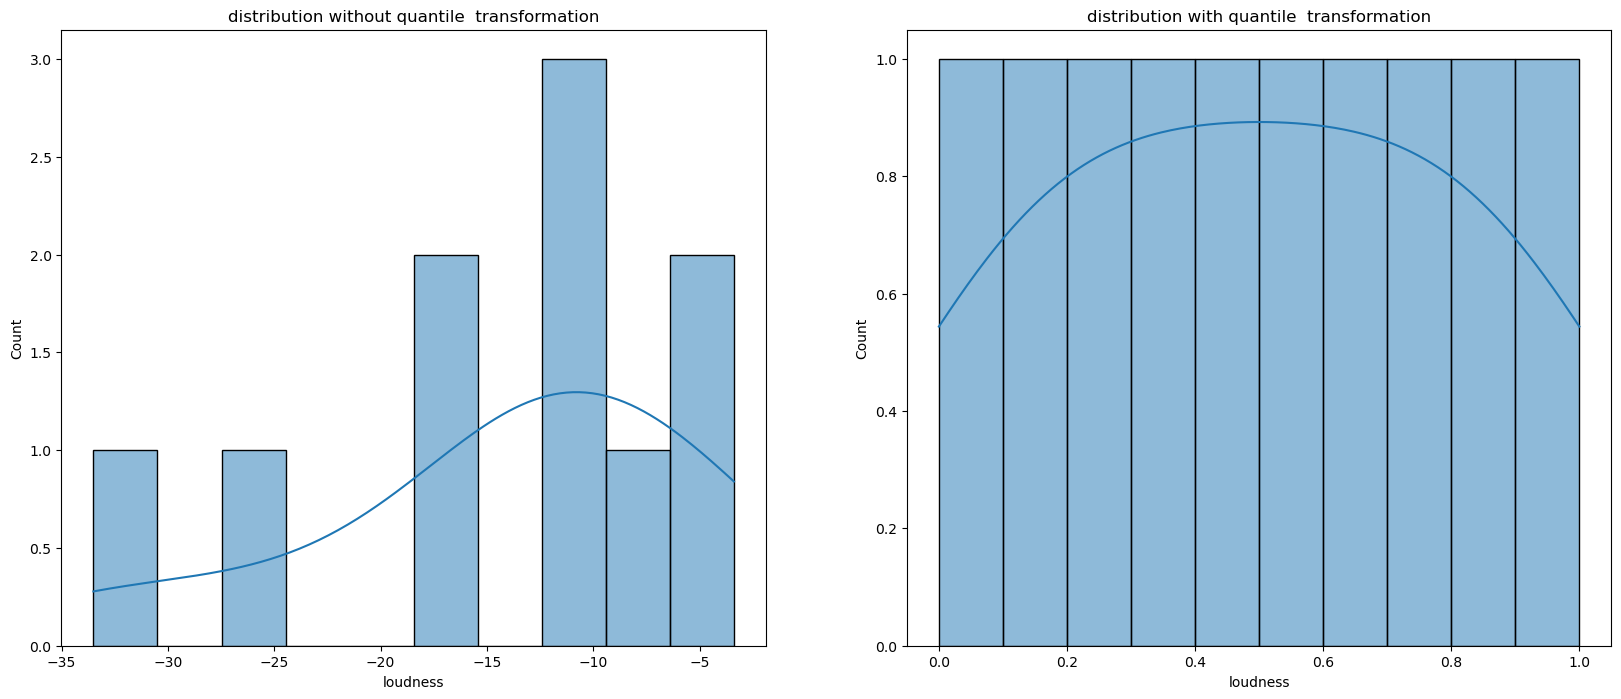

In [36]:
#compare the effect of quantile  transformation  over loudness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(data=songs_df_cl_quantile.iloc[:,3], bins=10, kde=True, ax=ax2);

ax1.set_title('distribution without quantile  transformation')
ax2.set_title('distribution with quantile  transformation')

plt.show()

Text(0.5, 1.0, 'heatmap with quantile transformation')

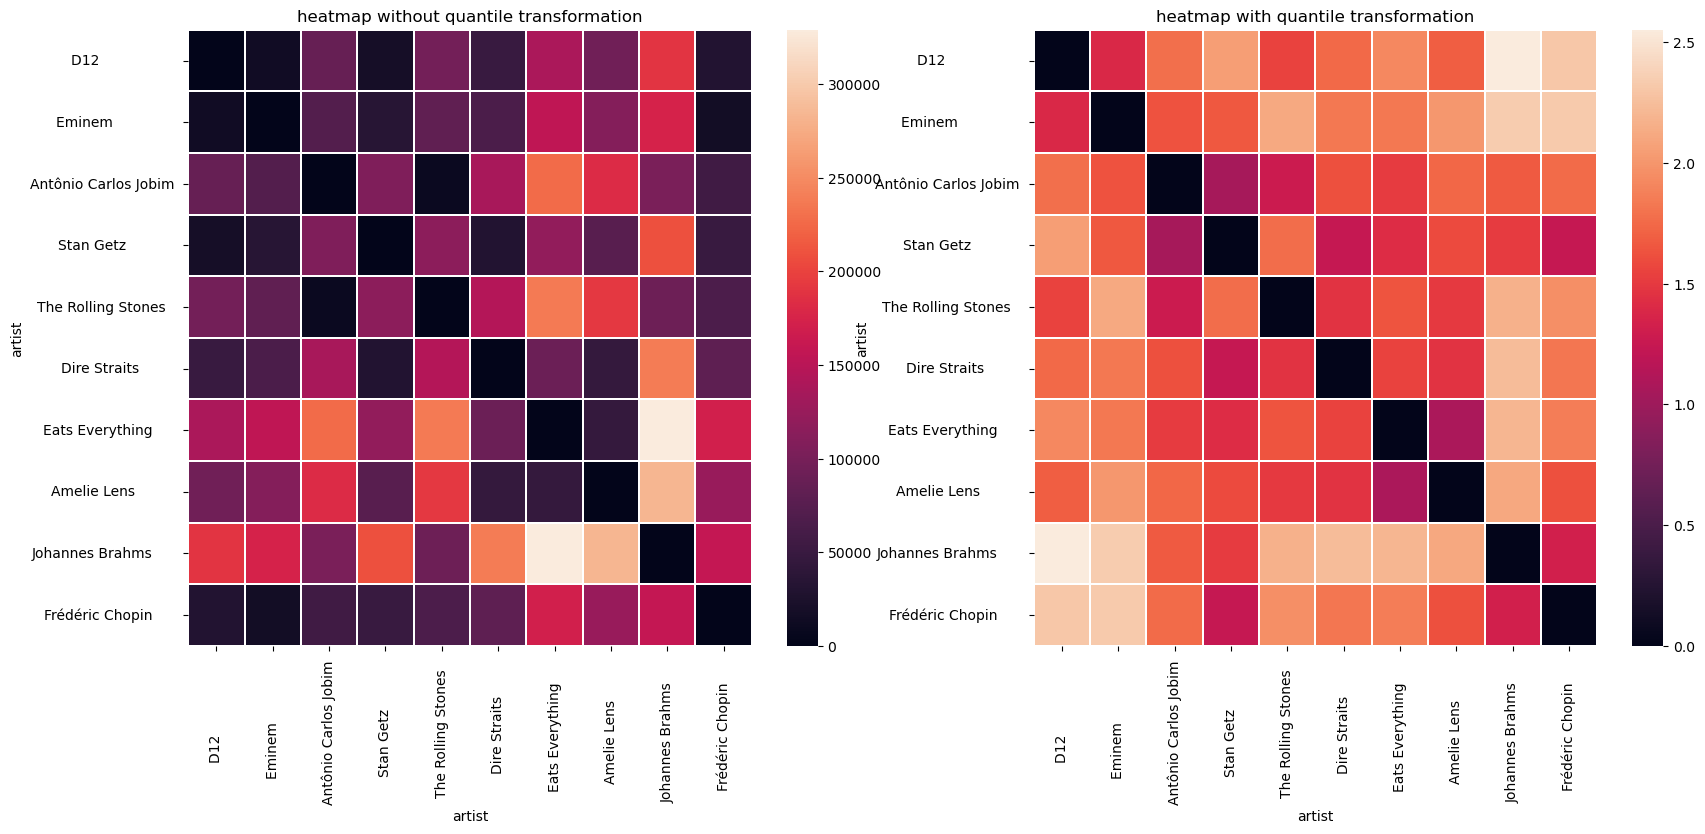

In [39]:
#effect of  quantile transformation over heatmap

songs_df_cl_quantile_pair = pd.DataFrame(pairwise_distances(songs_df_cl_quantile),
                                         index=songs_df_cl.index,
                                         columns= songs_df_cl.index)

songs_df_cl_pair = pd.DataFrame(pairwise_distances(songs_df_cl),
                                index=songs_df_cl.index,
                                columns=songs_df_cl.index)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(data=songs_df_cl_pair, ax=ax1, linewidths=.2)
sns.heatmap(data=songs_df_cl_quantile_pair, ax=ax2, linewidths=.2)

ax1.set_title('heatmap without quantile transformation')
ax2.set_title('heatmap with quantile transformation')


###&nbsp; Power transformer

Power transformers transform the data via [power functions](https://en.wikipedia.org/wiki/Power_transform). They can use either the Yeo-Johnson transformation, or the Box-Cox transformation. You don't need to understand the maths behind this one, just know that it reshapes the data to more closely resemble the normal distribution.

Let's apply this to the whole DataFrame:

In [41]:
scaler_power = PowerTransformer().set_output(transform='pandas')
songs_df_cl_power= scaler_power.fit_transform(songs_df_cl)
songs_df_cl_power

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist,,,,,,,,,,,,,
D12,1.075317,1.078305,-1.323316,1.669676,-2.0,0.701909,0.374746,-0.851856,-0.078481,1.224185,-0.153505,0.097165,0.333333
Eminem,1.730514,0.308997,0.856157,1.413297,-2.0,-0.081333,-0.970704,-0.851869,-1.947847,1.000002,-0.666126,-0.064355,0.333333
Antônio Carlos Jobim,-0.100289,-0.718947,0.012636,-0.404512,0.5,1.644350,1.020441,-0.851869,-0.291008,0.208391,0.806331,-0.839203,0.333333
Stan Getz,-0.105232,-1.187652,1.748778,-0.535188,0.5,-0.869985,1.040181,-0.841586,-0.291008,-0.130399,0.200589,0.312094,0.333333
The Rolling Stones,-0.885990,0.843867,-1.323316,0.387232,0.5,0.927359,-0.897346,-0.836773,1.782122,0.579637,1.559634,-0.945429,0.333333
Dire Straits,0.376040,0.839630,0.856157,0.272369,0.5,-1.315126,-0.851966,-0.636517,1.635410,1.446581,1.029907,0.659174,0.333333
Eats Everything,0.465338,0.580179,0.470949,0.152030,0.5,1.219075,-1.078428,1.276120,-0.172277,-1.392002,0.309201,1.707746,0.333333
Amelie Lens,0.392654,1.060559,-1.323316,-0.001417,0.5,-0.935765,-1.068930,1.304629,-0.172277,-0.821776,0.148609,1.179338,0.333333
Johannes Brahms,-1.777817,-1.434535,0.012636,-1.755960,0.5,-0.287525,1.215321,0.975409,-0.311480,-0.771330,-1.616974,-1.868875,-3.000000


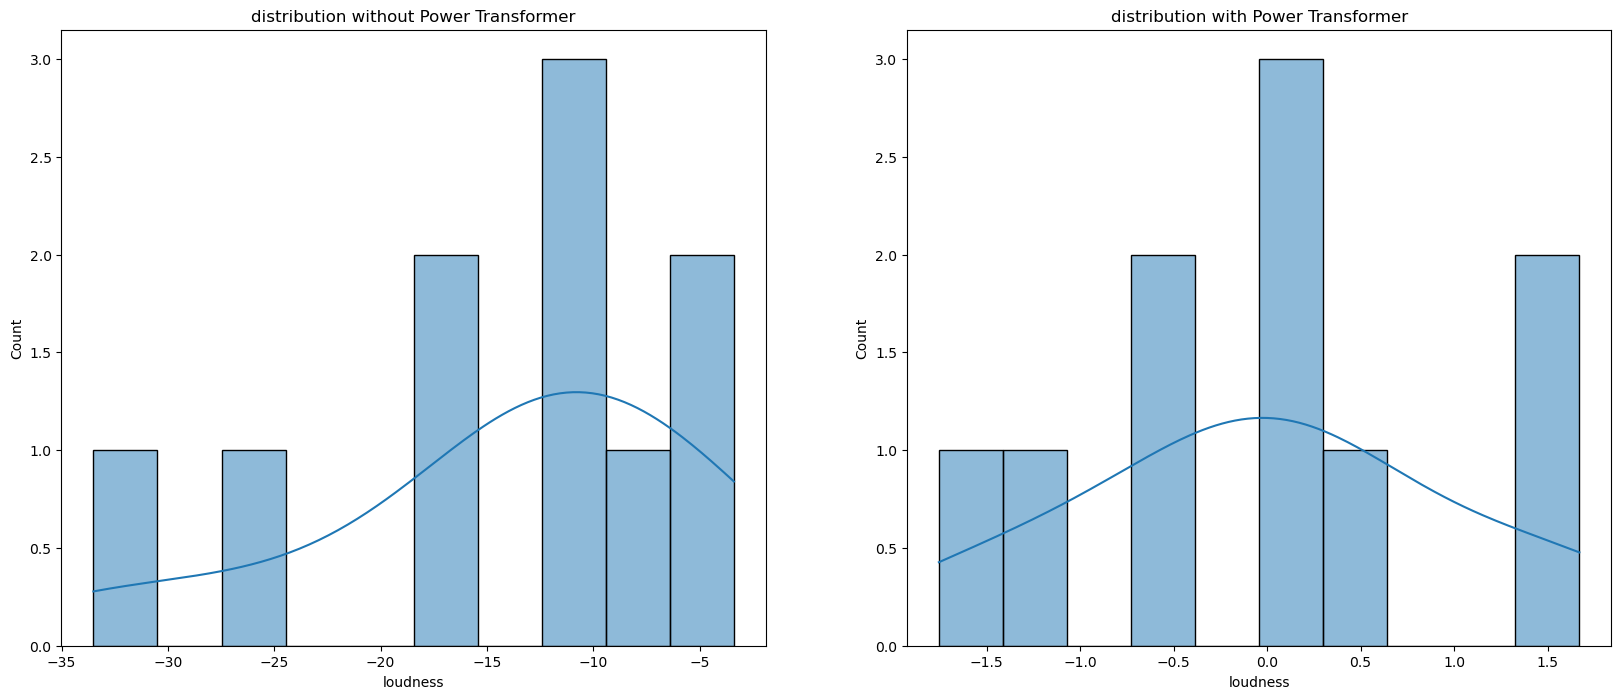

In [42]:
#compare the effect of quantile  transformation  over loudness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax=ax1);
sns.histplot(data=songs_df_cl_power.iloc[:,3], bins=10, kde=True, ax=ax2);

ax1.set_title('distribution without Power Transformer')
ax2.set_title('distribution with Power Transformer')

plt.show()

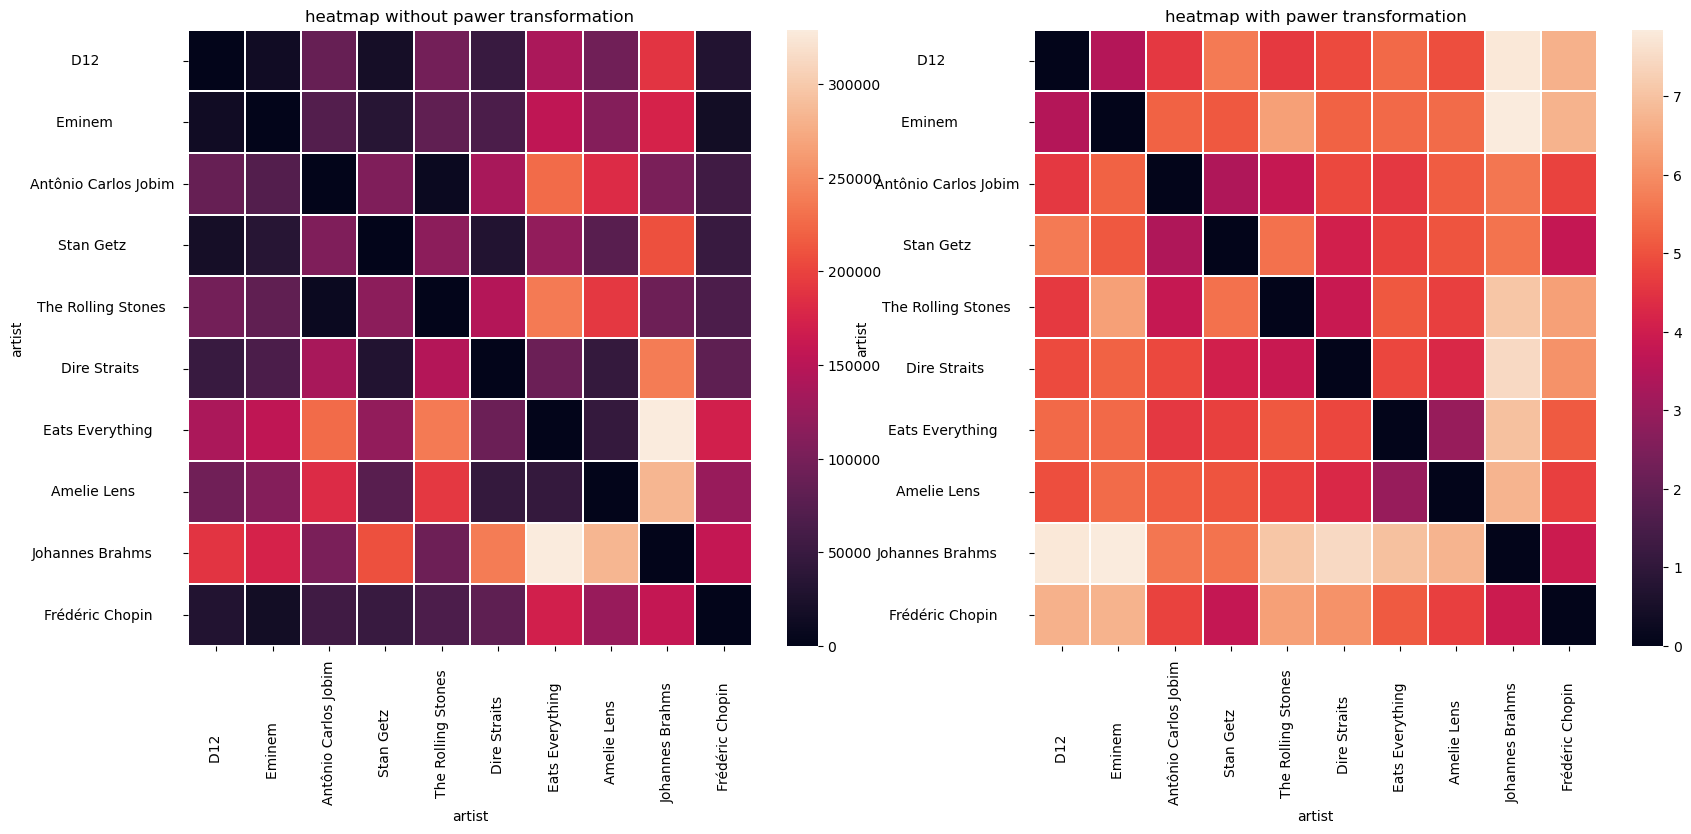

In [44]:
#effect of  quantile transformation over heatmap

songs_df_cl_power_pair = pd.DataFrame(pairwise_distances(songs_df_cl_power),
                                         index=songs_df_cl.index,
                                         columns= songs_df_cl.index)

songs_df_cl_pair = pd.DataFrame(pairwise_distances(songs_df_cl),
                                index=songs_df_cl.index,
                                columns=songs_df_cl.index)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.heatmap(data=songs_df_cl_pair, ax=ax1, linewidths=.2)
sns.heatmap(data=songs_df_cl_power_pair, ax=ax2, linewidths=.2)

ax1.set_title('heatmap without pawer transformation')
ax2.set_title('heatmap with pawer transformation')

plt.show()

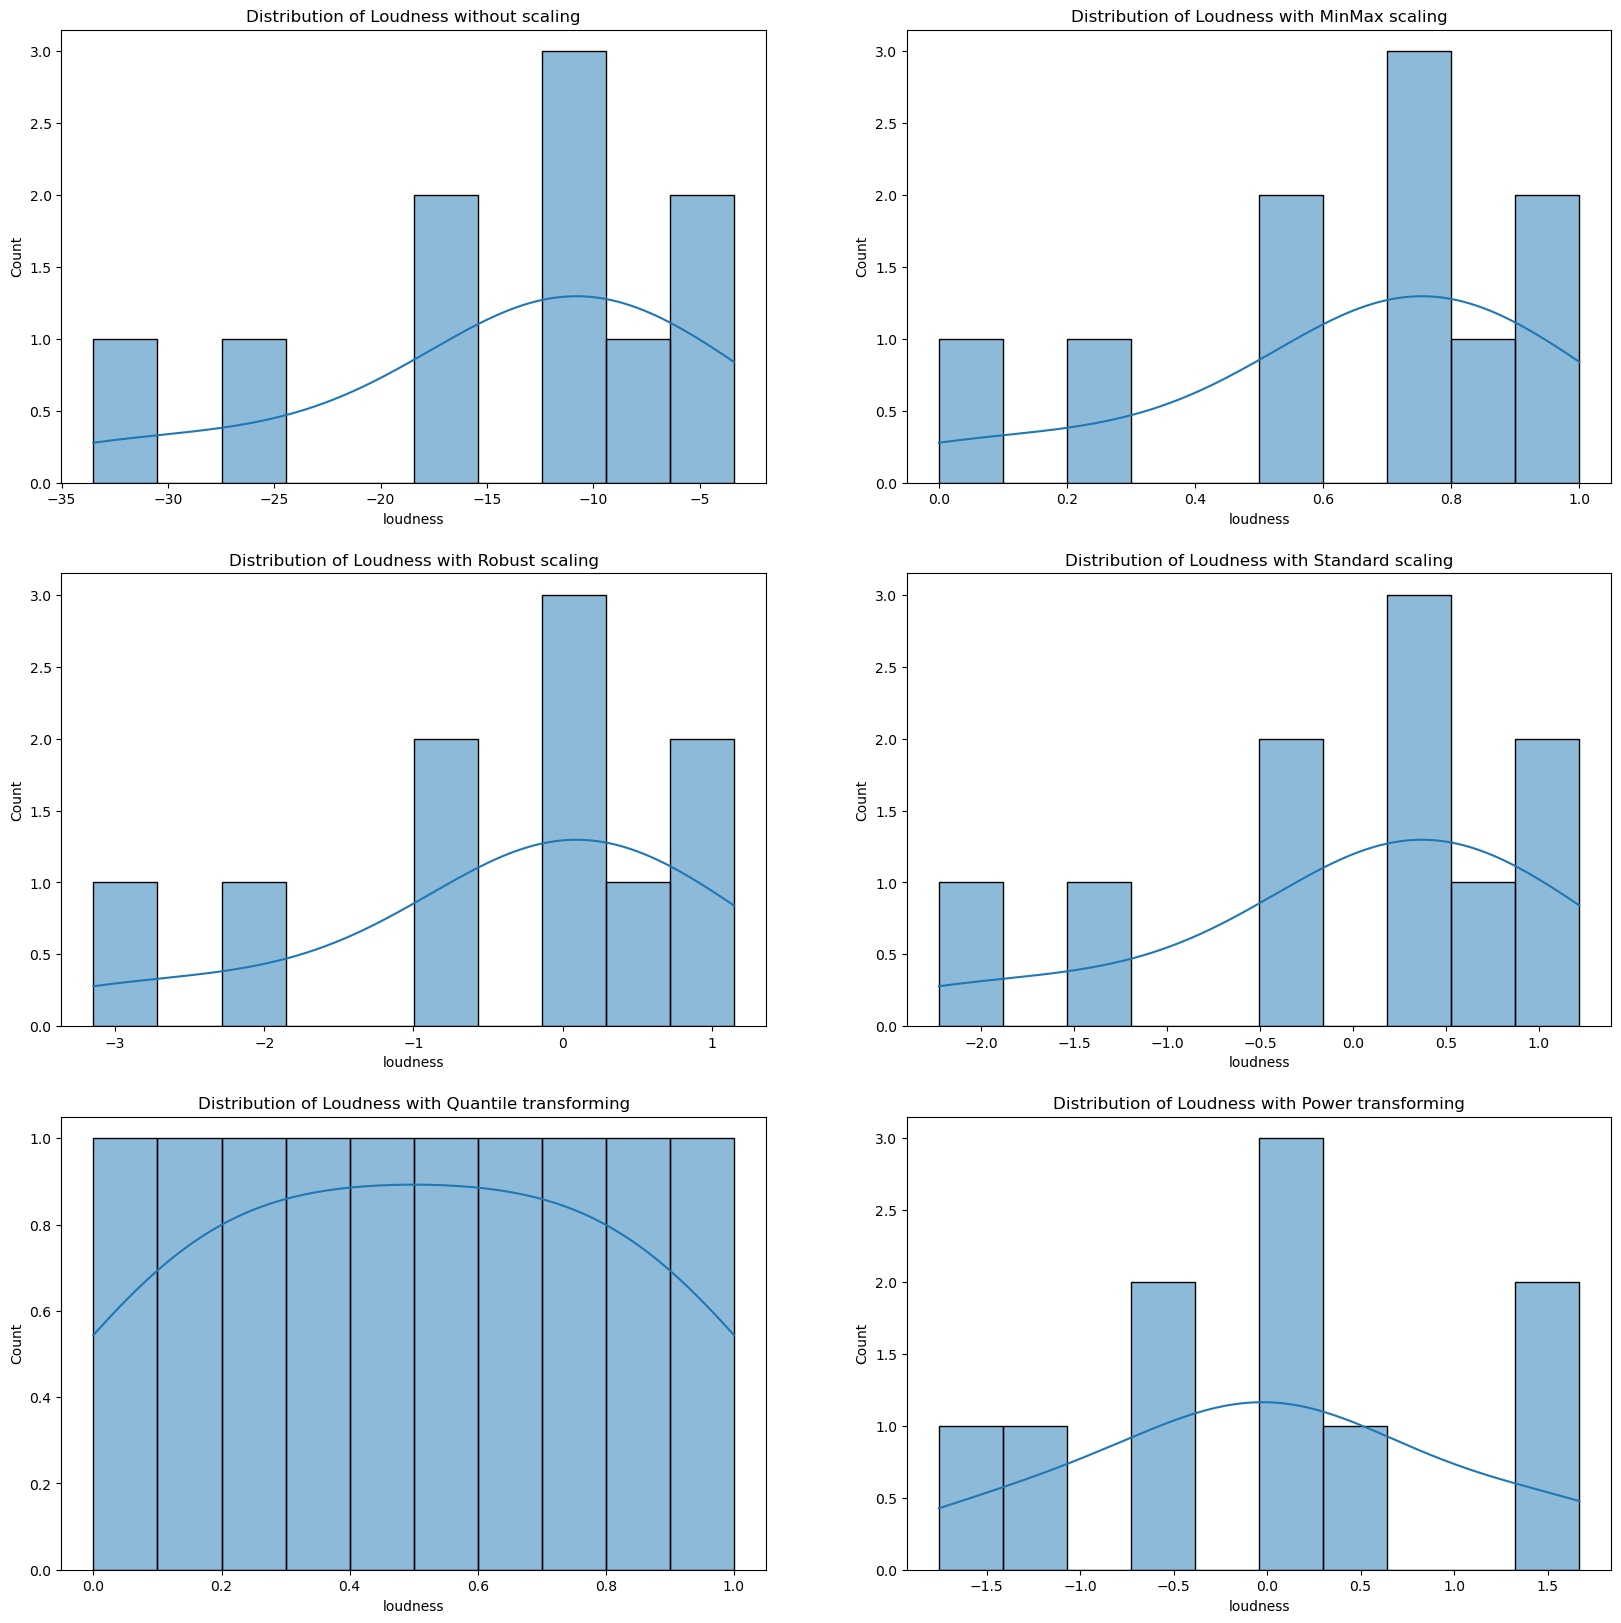

In [46]:
#all 6 histograms for comparison

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=songs_df_cl.iloc[:,3], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=songs_df_cl_mm.iloc[:,3], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=songs_df_cl_robust.iloc[:,3], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=songs_df_cl_standard.iloc[:,3], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=songs_df_cl_quantile.iloc[:,3], bins=10, kde=True, ax=ax[2, 0]);
sns.histplot(data=songs_df_cl_power.iloc[:,3], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title('Distribution of Loudness without scaling')
ax[0, 1].set_title('Distribution of Loudness with MinMax scaling')
ax[1, 0].set_title('Distribution of Loudness with Robust scaling')
ax[1, 1].set_title('Distribution of Loudness with Standard scaling')
ax[2, 0].set_title('Distribution of Loudness with Quantile transforming')
ax[2, 1].set_title('Distribution of Loudness with Power transforming')

plt.show()

Text(0.5, 1.0, 'Heatmap with Power transforming')

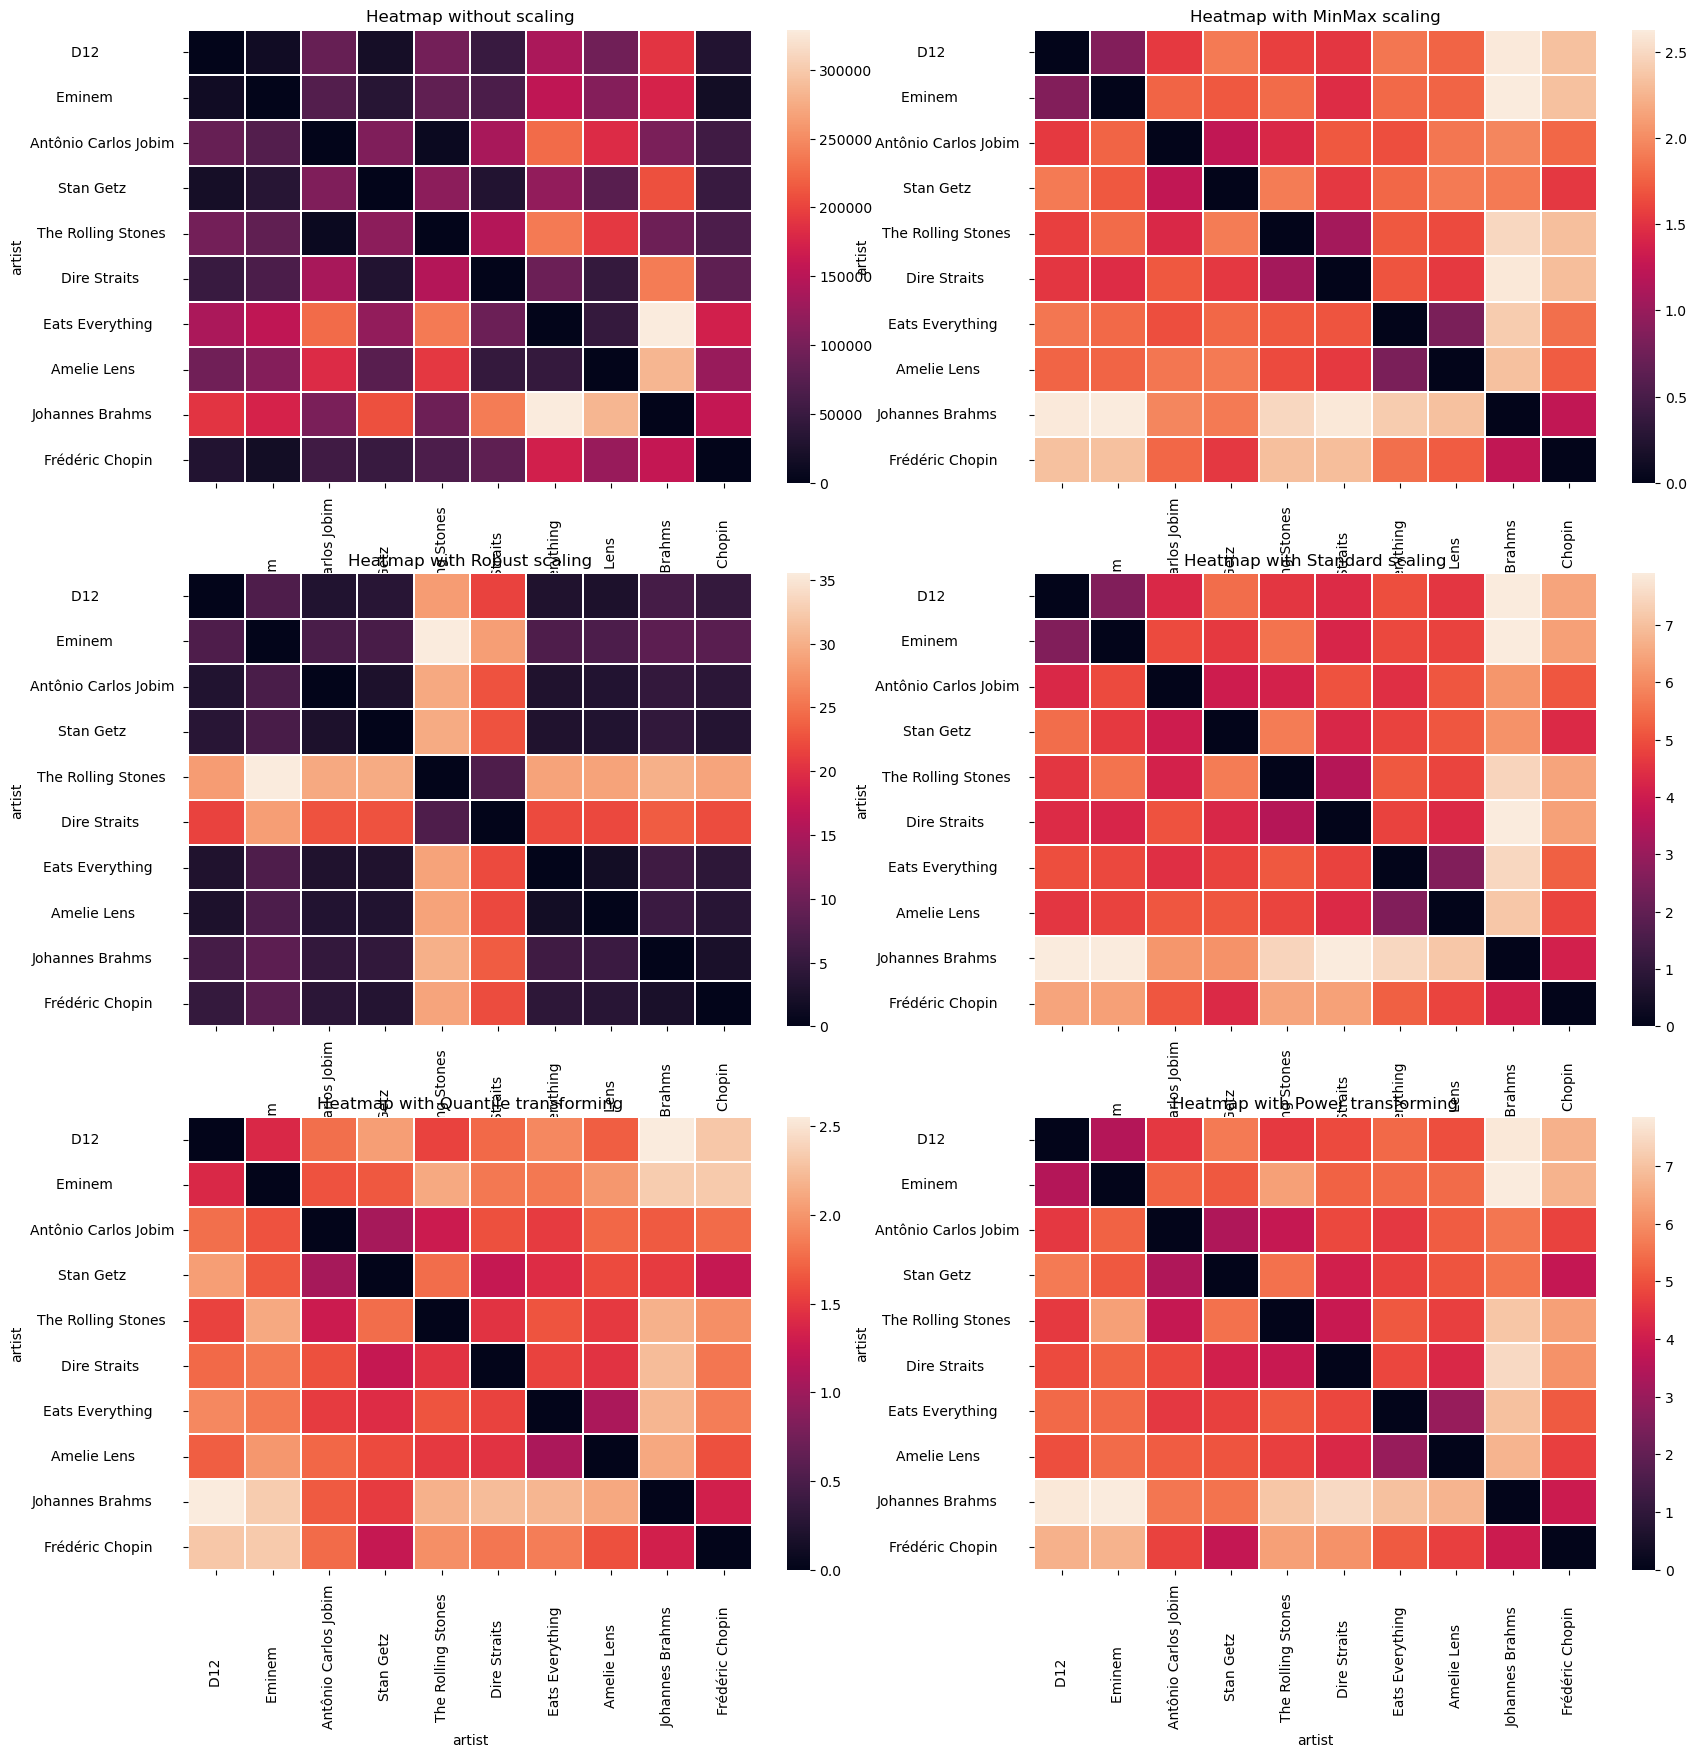

In [47]:
#all 6 Heatmaps for comaprison
fiyg, ax = plt.subplots(3, 2, figsize=(20,20))

sns.heatmap(songs_df_cl_pair, ax=ax[0,0], linewidths=.2);
sns.heatmap(songs_df_cl_mm_pair, ax= ax[0,1], linewidths= .2);
sns.heatmap(songs_df_cl_robust_pair, ax= ax[1,0], linewidths=.2);
sns.heatmap(songs_df_cl_standard_pair, ax=ax[1,1], linewidths=.2);
sns.heatmap(songs_df_cl_quantile_pair, ax=ax[2,0], linewidths=.2);
sns.heatmap(songs_df_cl_power_pair, ax=ax[2,1], linewidths=.2);

ax[0, 0].set_title('Heatmap without scaling')
ax[0, 1].set_title('Heatmap with MinMax scaling')
ax[1, 0].set_title('Heatmap with Robust scaling')
ax[1, 1].set_title('Heatmap with Standard scaling')
ax[2, 0].set_title('Heatmap with Quantile transforming')
ax[2, 1].set_title('Heatmap with Power transforming')